In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [32]:
sea = pd.read_csv("data/sea-level.csv", delimiter=",", decimal=".", parse_dates=["Year"])
sea.Year = sea.Year.dt.strftime('%Y')
#sea["NOAA Adjusted Sea Level"] = sea["NOAA Adjusted Sea Level"].replace(np.nan, 0)
sea

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


In [68]:
years = np.arange(1993, 2015, 5)

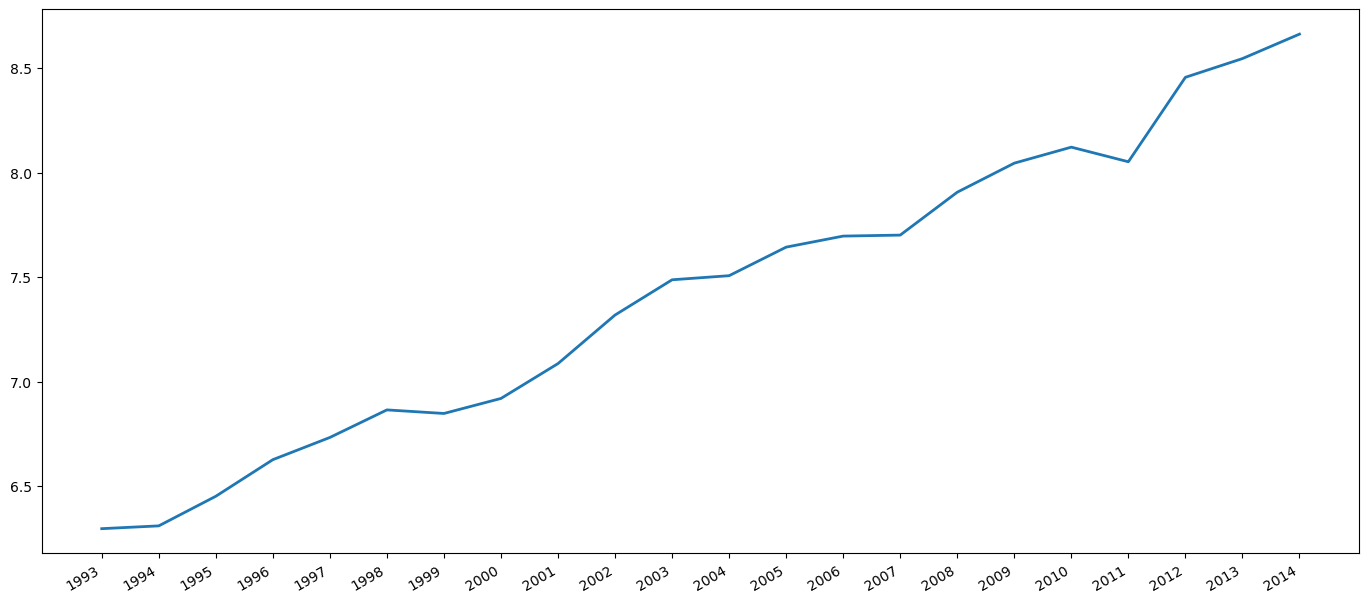

In [74]:
fig, ax = fig, ax = plt.subplots(1, figsize = (17, 8))
fig.autofmt_xdate()
ax.plot(sea[113:]["Year"], sea[113:]["NOAA Adjusted Sea Level"], linewidth=2)
plt.show()